https://bit.ly/RSML-4-factor

## Explicit

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095455 sha256=101e3b6516d94bf472950aaec8411db6e11c0f66d456966e8ea7d51d187195e3
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

import pandas as pd
import numpy as np

In [ ]:
!wget 'https://drive.google.com/uc?id=1m0rwReR09achL0xTM6QPoN4tykz5bOMx' -O MovieLens.zip

--2023-06-08 14:57:56--  https://drive.google.com/uc?id=1m0rwReR09achL0xTM6QPoN4tykz5bOMx
Resolving drive.google.com (drive.google.com)... 173.194.74.102, 173.194.74.138, 173.194.74.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.74.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mvde2bl9p31uu5bj1acltp0rcdnaprb6/1686236250000/02611596255248067438/*/1m0rwReR09achL0xTM6QPoN4tykz5bOMx?uuid=08ea4b60-cf96-4b69-b4c9-0fa474d55e1c [following]
--2023-06-08 14:57:57--  https://doc-0g-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mvde2bl9p31uu5bj1acltp0rcdnaprb6/1686236250000/02611596255248067438/*/1m0rwReR09achL0xTM6QPoN4tykz5bOMx?uuid=08ea4b60-cf96-4b69-b4c9-0fa474d55e1c
Resolving doc-0g-84-docs.googleusercontent.com (doc-0g-84-docs.googleusercontent.com)... 142.250.125.132, 2607:f8b0:4001:c2f::84
Connecting to doc-0

In [ ]:
!unzip MovieLens.zip

Archive:  MovieLens.zip
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                


In [ ]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movies_with_ratings = movies.set_index('movieId').join(ratings.set_index('movieId')).reset_index(drop=True)
movies_with_ratings.dropna(inplace=True)
movies_with_ratings.head()

,title,genres,userId,rating,timestamp
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


In [ ]:
dataset = pd.DataFrame({
    'uid': movies_with_ratings.userId,
    'iid': movies_with_ratings.title,
    'rating': movies_with_ratings.rating
})

dataset.head()

,uid,iid,rating
0,1.0,Toy Story (1995),4.0
1,5.0,Toy Story (1995),4.0
2,7.0,Toy Story (1995),4.5
3,15.0,Toy Story (1995),2.5
4,17.0,Toy Story (1995),4.5


In [ ]:
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(dataset, reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=.15, random_state=42)

In [ ]:
%%time
algo = SVD(n_factors=40, n_epochs=20, random_state=10)
algo.fit(trainset)

CPU times: user 984 ms, sys: 3.98 ms, total: 988 ms
Wall time: 1.05 s


In [ ]:
test_pred = algo.test(testset)
test_pred[:10]

[Prediction(uid=482.0, iid='Annie Hall (1977)', r_ui=3.0, est=3.8391926466979176, details={'was_impossible': False}),
 Prediction(uid=64.0, iid='Backdraft (1991)', r_ui=3.0, est=3.701655127299065, details={'was_impossible': False}),
 Prediction(uid=440.0, iid='Close Encounters of the Third Kind (1977)', r_ui=4.5, est=3.850529312802312, details={'was_impossible': False}),
 Prediction(uid=448.0, iid='Annie (1982)', r_ui=3.0, est=2.800475769494716, details={'was_impossible': False}),
 Prediction(uid=225.0, iid='Psycho (1960)', r_ui=3.0, est=4.388091799567721, details={'was_impossible': False}),
 Prediction(uid=510.0, iid='Boogie Nights (1997)', r_ui=3.0, est=3.433140918118112, details={'was_impossible': False}),
 Prediction(uid=6.0, iid='Powder (1995)', r_ui=4.0, est=3.3377698064842822, details={'was_impossible': False}),
 Prediction(uid=590.0, iid='Christmas Story, A (1983)', r_ui=4.0, est=3.881038206210199, details={'was_impossible': False}),
 Prediction(uid=68.0, iid='True Romance (199

In [ ]:
accuracy.rmse(test_pred, verbose=True)

RMSE: 0.8705


0.8704516311999524

In [ ]:
algo.predict(uid=2.0, iid='Mortal Kombat (1995)')

Prediction(uid=2.0, iid='Mortal Kombat (1995)', r_ui=None, est=2.6644868359849756, details={'was_impossible': False})

#### Рекомендации

In [ ]:
def generate_recommendation(uid, model, dataset, thresh=4, amount=5):
    all_titles = list(dataset['iid'].values)
    users_seen_titles = dataset[dataset['uid'] == uid]['iid']
    titles = np.array(list(set(all_titles) - set(users_seen_titles)))

    np.random.shuffle(titles)

    rec_list = []
    for title in titles:
        review_prediction = model.predict(uid=uid, iid=title)
        rating = review_prediction.est

        if rating >= thresh:
            rec_list.append((title, round(rating, 2)))

            if len(rec_list) >= amount:
                return rec_list

In [ ]:
generate_recommendation(2, algo, dataset, thresh=4.3)

[("Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)", 4.32),
 ('Touch of Evil (1958)', 4.3),
 ('Lawrence of Arabia (1962)', 4.43),
 ('Philadelphia Story, The (1940)', 4.32),
 ('Rear Window (1954)', 4.33)]

## Implicit


https://github.com/benfred/implicit

In [ ]:
!pip install implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 18.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook

import scipy.sparse as sparse

from implicit.als import AlternatingLeastSquares

In [ ]:
!pip install gdown
!gdown 'https://docs.google.com/uc?id=1oHHatrb1ZK7_hquzgjDBEa4RcJlnNp8B' -O usersha1-artmbid-artname-plays.tsv.zip

Downloading...
From (original): https://docs.google.com/uc?id=1oHHatrb1ZK7_hquzgjDBEa4RcJlnNp8B
From (redirected): https://docs.google.com/uc?id=1oHHatrb1ZK7_hquzgjDBEa4RcJlnNp8B&confirm=t&uuid=26d59e50-24c9-4eeb-b1fd-933fb3110c42
To: /content/usersha1-artmbid-artname-plays.tsv.zip
100% 556M/556M [00:06<00:00, 79.6MB/s]


In [ ]:
!unzip usersha1-artmbid-artname-plays.tsv.zip

Archive:  usersha1-artmbid-artname-plays.tsv.zip
  inflating: usersha1-artmbid-artname-plays.tsv  


In [ ]:
%%time
raw_data = pd.read_table('usersha1-artmbid-artname-plays.tsv', header=None, names=['user', 'artmid', 'artist', 'plays'])

CPU times: user 24.6 s, sys: 1.51 s, total: 26.1 s
Wall time: 30 s


In [ ]:
raw_data.head()

,user,artmid,artist,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [ ]:
raw_data = raw_data.drop(raw_data.columns[1], axis=1)

In [ ]:
raw_data.head()

,user,artist,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706


In [ ]:
data = raw_data.dropna()

In [ ]:
data['user'].nunique()

358868

In [ ]:
data['artist'].nunique()

292363

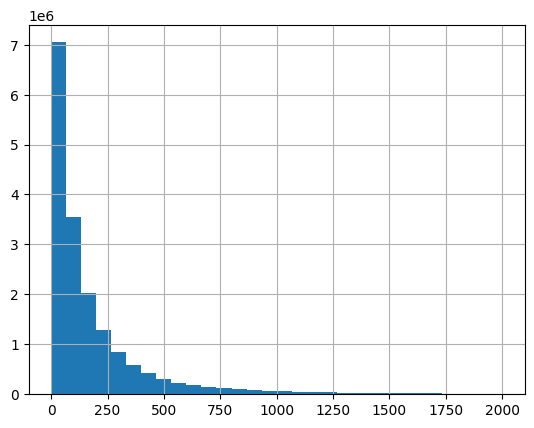

In [ ]:
data.iloc[np.where(data.plays < 2000)].plays.hist(bins=30);

In [ ]:
data = data.loc[data.plays != 0].reset_index(drop=True)

In [ ]:
data['user_id'] = data['user'].astype("category").cat.codes
data['artist_id'] = data['artist'].astype("category").cat.codes

data.head()

,user,artist,plays,user_id,artist_id
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137,0,45561
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099,0,90933
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897,0,185367
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717,0,106704
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706,0,155241


In [ ]:
item_lookup = data[['artist_id', 'artist']].drop_duplicates()

item_lookup.head()

,artist_id,artist
0,45561,betty blowtorch
1,90933,die Ärzte
2,185367,melissa etheridge
3,106704,elvenking
4,155241,juliette & the licks


In [ ]:
artist_id_name = {}

for index, row in tqdm_notebook(item_lookup.iterrows()):
    artist_id_name[row.artist_id] = row.artist

<ipython-input-16-d7e927a21f56>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for index, row in tqdm_notebook(item_lookup.iterrows()):


0it [00:00, ?it/s]

In [ ]:
artist_id_name

{45561: 'betty blowtorch',
 90933: 'die Ärzte',
 185367: 'melissa etheridge',
 106704: 'elvenking',
 155241: 'juliette & the licks',
 220128: 'red hot chili peppers',
 177597: 'magica',
 252797: 'the black dahlia murder',
 259856: 'the murmurs',
 175802: 'lunachicks',
 278311: 'walls of jericho',
 169906: 'letzte instanz',
 126690: 'goldfrapp',
 137062: 'horrorpops',
 253488: 'the butchies',
 144293: 'jack off jill',
 37515: 'babes in toyland',
 100639: 'dropkick murphys',
 19592: 'all:my:faults',
 167984: 'le tigre',
 230100: 'schandmaul',
 103711: 'edguy',
 184079: 'maximum the hormone',
 19356: 'all ends',
 144238: 'jack johnson',
 106689: 'eluveitie',
 219078: 'rasputina',
 172574: 'london after midnight',
 258212: 'the killers',
 194518: 'mutyumu',
 154684: 'judas priest',
 223386: 'rob zombie',
 253139: 'the bosshoss',
 51085: 'blue Öyster cult',
 228759: 'sandra nasic',
 151766: 'john mayer',
 237283: 'sleater-kinney',
 264743: 'the who',
 92172: 'disciple',
 249370: 'tanzwut',


In [ ]:
len_users = data.user_id.nunique()
len_artists = data.artist_id.nunique()

In [ ]:
len_users, len_artists

(358868, 292363)

In [ ]:
rows = data.user_id.astype(int)
cols = data.artist_id.astype(int)
plays = list(data.plays)

In [ ]:
rows[:5]

0    0
1    0
2    0
3    0
4    0
Name: user_id, dtype: int64

In [ ]:
cols[:5]

0     45561
1     90933
2    185367
3    106704
4    155241
Name: artist_id, dtype: int64

In [ ]:
plays[:5]

[2137, 1099, 897, 717, 706]

In [ ]:
data_sparse = sparse.csr_matrix((plays, (rows, cols)),
                                 shape=(len_users, len_artists))
data_sparse

<358868x292363 sparse matrix of type '<class 'numpy.int64'>'
	with 17535375 stored elements in Compressed Sparse Row format>

In [ ]:
# data_sparse.toarray()

In [ ]:
data.head()

,user,artist,plays,user_id,artist_id
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137,0,45561
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099,0,90933
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897,0,185367
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717,0,106704
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706,0,155241


In [ ]:
data_sparse[0,45561]

2137

In [ ]:
model = AlternatingLeastSquares(factors=50, random_state=1, iterations=15)
model.fit(data_sparse)

  0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
userid = 1111

recommendations = model.recommend(userid, user_items=data_sparse[userid], N=5)

In [ ]:
data_sparse[userid]

<1x292363 sparse matrix of type '<class 'numpy.int64'>'
	with 46 stored elements in Compressed Sparse Row format>

In [ ]:
recommendations

(array([171898, 128172, 170375, 253616,  73856], dtype=int32),
 array([1.1761769, 1.0925612, 1.0866082, 1.0862141, 1.0791241],
       dtype=float32))

In [ ]:
for r in recommendations[0]:
    print(artist_id_name[r])

live
green day
lifehouse
the cardigans
coldplay


In [ ]:
data[data['user_id'] == userid]['artist'].values

array(['hateen', 'ihab tawfik', 'tarkan', 'foo fighters', 'ride',
       'audioslave', 'social distortion', 'wael kfoury', 'pin ups',
       'the draft', 'hot water music', 'mazikana_ehab_tawfik',
       'snow patrol', 'jimmy eat world', 'damien rice', 'samira said',
       'ehab tawfiq', 'dido', 'panic! at the disco', 'inspiral carpets',
       'saves the day', 'nickelback', 'alkaline trio', 'maná',
       'amy winehouse', 'baby bash', 'ramones', 'oasis', 'nada surf',
       'fall out boy', 'fresno', 'garage fuzz', 'ashanti', 'johnny cash',
       'the ataris', 'the beatles', 'goo goo dolls', 'the perishers',
       '3 doors down', 'mustafa amar', 'nxzero', 'new order', 'relient k',
       'rbd', 'semisonic', 'street bulldogs'], dtype=object)

In [ ]:
itemid = 107209
related = model.similar_items(itemid)

In [ ]:
artist_id_name[itemid]

'eminem'

In [ ]:
for a in related[0]:
    print(artist_id_name[a])

eminem
kanye west
50 cent
2pac
jay-z
snoop dogg
damian marley/damian marley/damian marley
michael jackson
dr. dre
t.i.


## Дополнительные материалы

1. Матричная факторизация для фильмов https://youtu.be/ZspR5PZemcs
2. Коллаборативная фильтрация с матричной факторизацией https://github.com/yanneta/pytorch-tutorials/blob/master/collaborative-filtering-nn.ipynb